In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
starwis = pd.read_csv("../original_data/starwis_satamakatu.csv")
weather = pd.read_csv("../original_data/Tie_9_Jyväskylä.csv")

In [3]:
print(starwis.columns)

Index(['ts', 'Friction', 'Road_Surface_Temperature', 'Water_Film_Surface_mm'], dtype='object')


In [4]:
print(weather.columns)

Index(['ts', 'airTemp', 'roadTemp', 'friction3', 'humidity', 'dewpoint',
       'precipitation'],
      dtype='object')


Combine starwis and weather, since they share same time period with sameish 10minute step

In [5]:
# drop from weather station dataset:
# friction3 - there are 100k missing values
# roadTemp - we already have it in more accurate form in starwis dataset  

weather.drop(["friction3", "roadTemp"], axis=1, inplace=True)


In [6]:
# Convert the 'timestamp' columns in both dataframes to datetime format
weather['ts'] = pd.to_datetime(weather['ts'])
starwis['ts'] = pd.to_datetime(starwis['ts'], format='mixed')

# Sort the dataframes by 'timestamp' before using merge_asof
weather = weather.sort_values('ts')
starwis = starwis.sort_values('ts')

In [7]:
# Perform an asof merge, joining on the nearest timestamp within a tolerance
# Set the tolerance to a suitable time difference (e.g., 5 minutes)
# (if time difference is more than 5 minutes, data points won't be joined)
df = pd.merge_asof(weather, starwis, on='ts', direction='nearest', tolerance=pd.Timedelta('5min'))

In [8]:
# Drop data points that couldn't be joined and other missing values
df.dropna(inplace=True)

In [9]:
df["ts"] = pd.to_datetime(df.ts)
df.set_index("ts", inplace=True)

In [10]:
# Filter data between november and march
df_2021 = df[(df.index >= "2021-11-01 00:00:00") & (df.index < "2022-04-01 00:00:00")]
df_2021 = df_2021.resample('10min').mean()
df_2021 = df_2021.interpolate(method="time")
df_2021.to_csv("../ready_data/winter_2021.csv")

df_2022 = df[(df.index >= "2022-11-01 00:00:00") & (df.index < "2023-04-01 00:00:00")]
df_2022 = df_2022.resample('10min').mean()
df_2022 = df_2022.interpolate(method="time")
df_2022.to_csv("../ready_data/winter_2022.csv")

df_2023 = df[(df.index >= "2023-11-01 00:00:00") & (df.index < "2024-04-01 00:00:00")]
df_2023 = df_2023.resample('10min').mean()
df_2023 = df_2023.interpolate(method="time")
df_2023.to_csv("../ready_data/winter_2023.csv")

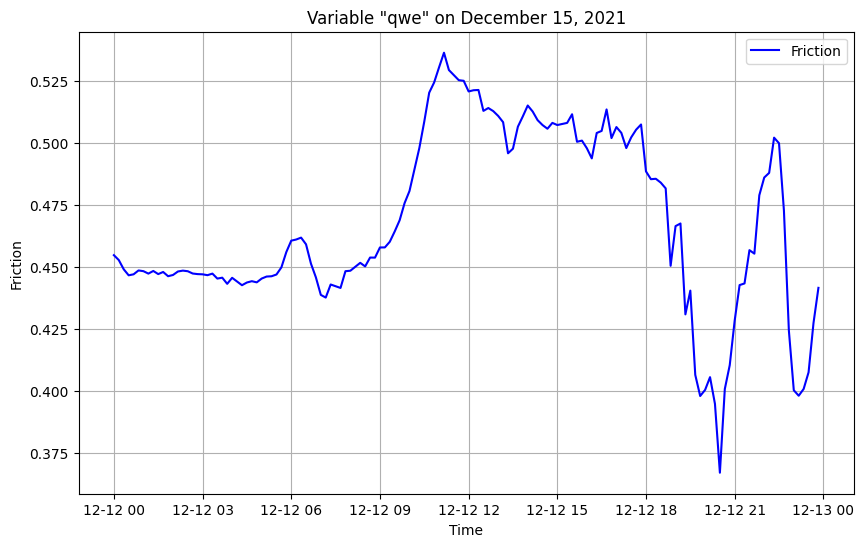

In [24]:
# Choose a specific winter day (e.g., December 15, 2021)
specific_day = df.loc['2023-12-12']  # Change the date accordingly
# Save it to be a test data
specific_day.to_csv("../ready_data/test_day.csv")
# Plot the 'qwe' variable for that day
plt.figure(figsize=(10, 6))
plt.plot(specific_day.index, specific_day['Friction'], label="Friction", color='b')
plt.title('Variable "qwe" on December 15, 2021')
plt.xlabel('Time')
plt.ylabel('Friction')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df = pd.concat([df_2021,df_2022, df_2023])
df.to_csv("../ready_data/winters_merged.csv")